Step 1: Import required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import pickle

Step 2: Load the dataset

In [14]:
df=pd.read_csv("youtube_dislike_dataset.csv")
df.head()

,video_id,title,channel_id,channel_title,published_at,view_count,likes,dislikes,comment_count,tags,description,comments
0,--0bCF-iK2E,Jadon Sancho Magical Skills & Goals,UC6UL29enLNe4mqwTfAyeNuw,Bundesliga,2021-07-01 10:00:00,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,Enjoy the best skills and goals from Jadon San...,"Respect to Dortmund fans,must be sad losing hi..."
1,--14w5SOEUs,Migos - Avalanche (Official Video),UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,2021-06-10 16:00:00,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,"Watch the the official video for Migos - ""Aval...",Migos just makes me want to live my live to th...
2,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,2021-09-20 01:03:32,925281,11212,401,831,,Hannah Waddingham wins the Emmy for Supporting...,Hannah's energy bursts through any screen. Wel...
3,--4tfbSyYDE,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO,UCsmXiDP8S40uBeJYxvyulmA,JO1,2021-03-03 10:00:17,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,JO1'YOUNG (JO1 ver.)' PERFORMANCE VIDEO\n\n---...,youngVer>< REN is really PERFECT. It's not ju...
4,--DKkzWVh-E,Why Retaining Walls Collapse,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,2021-12-07 13:00:00,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,One of the most important (and innocuous) part...,Keep up with all my projects here: https://pr...


In [15]:
df1=df.copy()

Step 3: Basic EDA and preprocessing


In [16]:
df.shape

(37422, 12)

In [17]:
df.columns

Index(['video_id', 'title', 'channel_id', 'channel_title', 'published_at',
       'view_count', 'likes', 'dislikes', 'comment_count', 'tags',
       'description', 'comments'],
      dtype='object')

In [18]:
df.dtypes

video_id         object
title            object
channel_id       object
channel_title    object
published_at     object
view_count        int64
likes             int64
dislikes          int64
comment_count     int64
tags             object
description      object
comments         object
dtype: object

In [19]:
df.describe().round()

,view_count,likes,dislikes,comment_count
count,3.742200e+04,37422.0,37422.0,37422.0
mean,5.697838e+06,166815.0,4990.0,9925.0
std,2.426622e+07,537567.0,30708.0,117100.0
min,2.036800e+04,0.0,0.0,0.0
25%,5.122970e+05,13234.0,281.0,900.0
50%,1.319078e+06,42330.0,796.0,2328.0
75%,3.670231e+06,130470.0,2462.0,6184.0
max,1.322797e+09,31837675.0,2397733.0,16071029.0


In [20]:
df.isna().sum()

video_id           0
title              0
channel_id         0
channel_title      0
published_at       0
view_count         0
likes              0
dislikes           0
comment_count      0
tags               0
description        0
comments         158
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37422 entries, 0 to 37421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       37422 non-null  object
 1   title          37422 non-null  object
 2   channel_id     37422 non-null  object
 3   channel_title  37422 non-null  object
 4   published_at   37422 non-null  object
 5   view_count     37422 non-null  int64 
 6   likes          37422 non-null  int64 
 7   dislikes       37422 non-null  int64 
 8   comment_count  37422 non-null  int64 
 9   tags           37422 non-null  object
 10  description    37422 non-null  object
 11  comments       37264 non-null  object
dtypes: int64(4), object(8)
memory usage: 3.4+ MB


In [23]:
dict1={}
for i in df:
    if df[i].dtype=="int64" or df[i].dtype=="float":
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        min_range=q1-1.5*iqr
        max_range=q3+1.5*iqr
        dict1[i]=(min_range,max_range)

In [24]:
dict1

{'view_count': (-4224604.375, 8407132.625),
 'likes': (-162620.875, 306324.125),
 'dislikes': (-2990.125, 5732.875),
 'comment_count': (-7026.0, 14110.0)}

In [25]:
# Remove Missing Values
df = df[df['tags'].str.strip().astype(bool)]

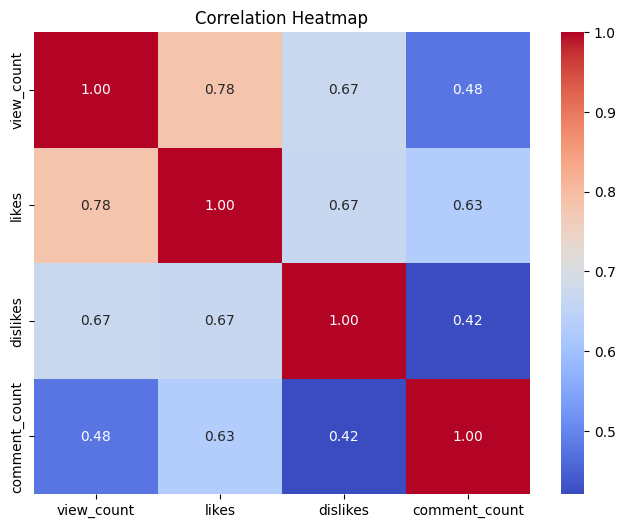

In [26]:
# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

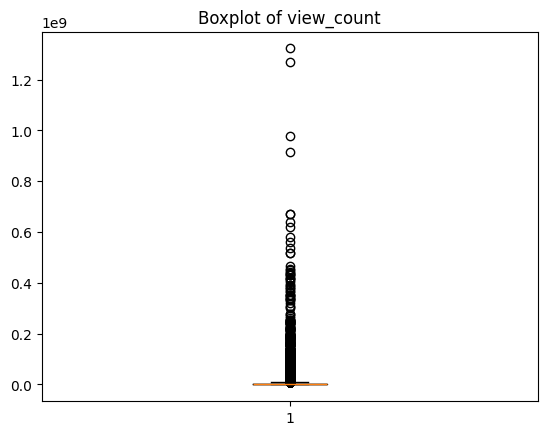

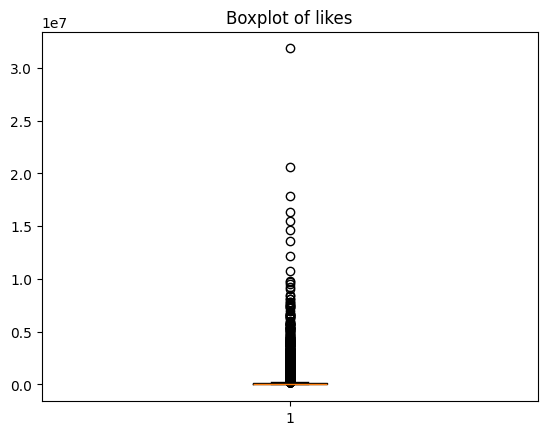

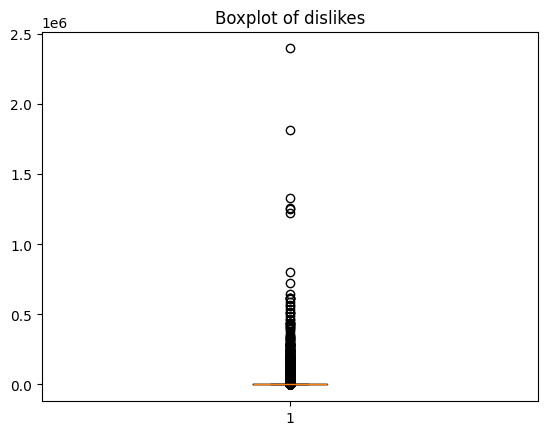

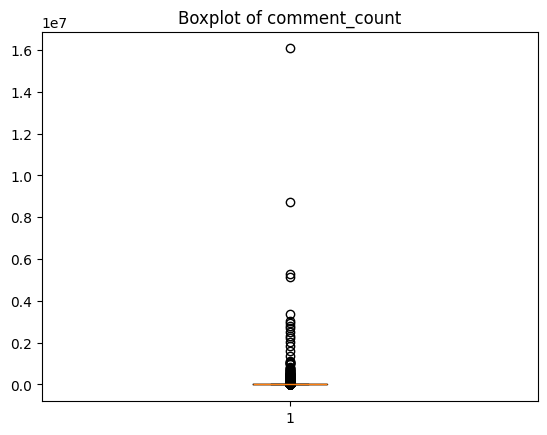

In [27]:
# Visualizing the distribution of numerical data
for i in df:
    if df[i].dtype=="int64" or df[i].dtype=="float64":
        plt.boxplot(df[i])
        plt.title(f"Boxplot of {i}")
        plt.show()

In [28]:
# Drop Unnecessary Columns
df.drop(columns=['video_id','title','channel_id','channel_title','published_at','description',],inplace=True)
df.head()

,view_count,likes,dislikes,comment_count,tags,comments
0,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,"Respect to Dortmund fans,must be sad losing hi..."
1,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,Migos just makes me want to live my live to th...
3,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,youngVer>< REN is really PERFECT. It's not ju...
4,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,Keep up with all my projects here: https://pr...
5,36124750,965069,16618,59657,Kpop girl group 1theK Starshiptv starship MV...,omg !! they are so young and......pretty !!!! ...


In [29]:
# Encode the 'tags' column
label_encoder = LabelEncoder()
df['tags_count'] = label_encoder.fit_transform(df['tags'])
df.head()

,view_count,likes,dislikes,comment_count,tags,comments,tags_count
0,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,"Respect to Dortmund fans,must be sad losing hi...",18123
1,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,Migos just makes me want to live my live to th...,8643
3,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,youngVer>< REN is really PERFECT. It's not ju...,9972
4,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,Keep up with all my projects here: https://pr...,24345
5,36124750,965069,16618,59657,Kpop girl group 1theK Starshiptv starship MV...,omg !! they are so young and......pretty !!!! ...,7528


In [30]:
# Feature Engineering
df['like_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1)
df['interaction_rate'] = (df['likes'] + df['dislikes'] + df['comment_count']) / (df['view_count'] + 1)
df.head()

,view_count,likes,dislikes,comment_count,tags,comments,tags_count,like_ratio,interaction_rate
0,1048888,19515,226,1319,football soccer ftbol alemn Bundesliga season ...,"Respect to Dortmund fans,must be sad losing hi...",18123,0.988502,0.020078
1,15352638,359277,7479,18729,Migos Avalanche Quality Control Music/Motown R...,Migos just makes me want to live my live to th...,8643,0.979605,0.025109
3,2641597,39131,441,3745,PRODUCE101JAPAN JO1 TheSTAR STA...,youngVer>< REN is really PERFECT. It's not ju...,9972,0.988831,0.016398
4,715724,32887,367,1067,retaining wall New Jersey highway Direct Conne...,Keep up with all my projects here: https://pr...,24345,0.988934,0.047953
5,36124750,965069,16618,59657,Kpop girl group 1theK Starshiptv starship MV...,omg !! they are so young and......pretty !!!! ...,7528,0.983071,0.028826


In [31]:
df.drop(columns=['tags'], inplace=True)
df.head()

,view_count,likes,dislikes,comment_count,comments,tags_count,like_ratio,interaction_rate
0,1048888,19515,226,1319,"Respect to Dortmund fans,must be sad losing hi...",18123,0.988502,0.020078
1,15352638,359277,7479,18729,Migos just makes me want to live my live to th...,8643,0.979605,0.025109
3,2641597,39131,441,3745,youngVer>< REN is really PERFECT. It's not ju...,9972,0.988831,0.016398
4,715724,32887,367,1067,Keep up with all my projects here: https://pr...,24345,0.988934,0.047953
5,36124750,965069,16618,59657,omg !! they are so young and......pretty !!!! ...,7528,0.983071,0.028826


In [32]:
# Define the target variable
df['viral'] = np.where(df['dislikes'] > df['likes'], 1, 0)  # 1 = failure, 0 = success
df.head()

,view_count,likes,dislikes,comment_count,comments,tags_count,like_ratio,interaction_rate,viral
0,1048888,19515,226,1319,"Respect to Dortmund fans,must be sad losing hi...",18123,0.988502,0.020078,0
1,15352638,359277,7479,18729,Migos just makes me want to live my live to th...,8643,0.979605,0.025109,0
3,2641597,39131,441,3745,youngVer>< REN is really PERFECT. It's not ju...,9972,0.988831,0.016398,0
4,715724,32887,367,1067,Keep up with all my projects here: https://pr...,24345,0.988934,0.047953,0
5,36124750,965069,16618,59657,omg !! they are so young and......pretty !!!! ...,7528,0.983071,0.028826,0


EDA

Univariate analysis

count    3.349300e+04
mean     1.488130e+05
std      5.112946e+05
min      0.000000e+00
25%      1.250300e+04
50%      3.913900e+04
75%      1.179250e+05
max      3.183768e+07
Name: likes, dtype: float64


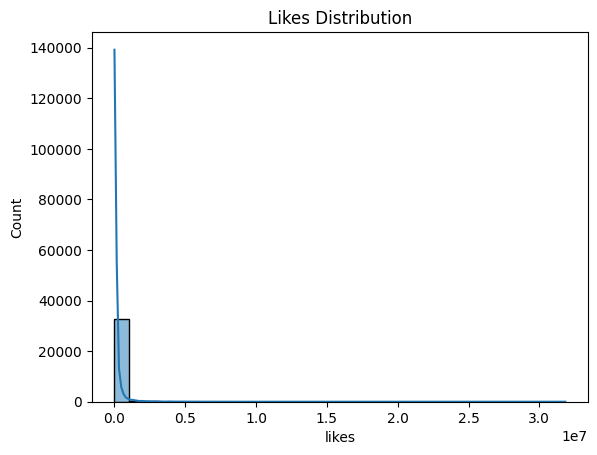

In [33]:
# Summary statistics
print(df['likes'].describe())
# Histogram
sns.histplot(df['likes'].dropna(), kde=True, bins=30)
plt.title('Likes Distribution')
plt.show()

count    3.349300e+04
mean     4.473879e+03
std      3.030141e+04
min      0.000000e+00
25%      2.720000e+02
50%      7.580000e+02
75%      2.253000e+03
max      2.397733e+06
Name: dislikes, dtype: float64


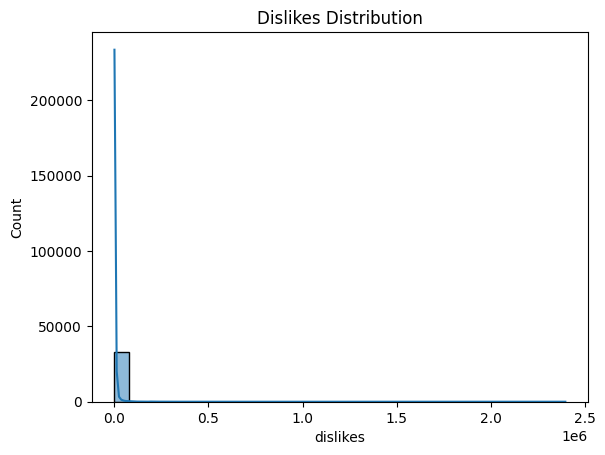

In [34]:
# Summary statistics
print(df['dislikes'].describe())
# Histogram
sns.histplot(df['dislikes'].dropna(), kde=True, bins=30)
plt.title('Dislikes Distribution')
plt.show()

count    3.349300e+04
mean     5.398326e+06
std      2.462146e+07
min      2.036800e+04
25%      4.923520e+05
50%      1.257350e+06
75%      3.432844e+06
max      1.322797e+09
Name: view_count, dtype: float64


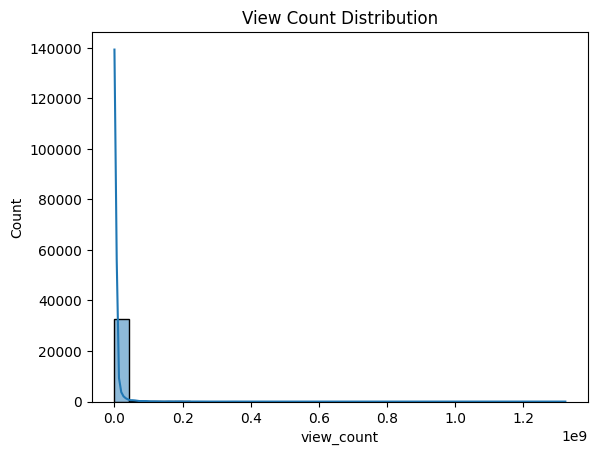

In [35]:
# Summary statistics
print(df['view_count'].describe())
# Histogram
sns.histplot(df['view_count'].dropna(), kde=True, bins=30)
plt.title('View Count Distribution')
plt.show()

count    3.349300e+04
mean     9.702401e+03
std      1.212068e+05
min      0.000000e+00
25%      8.790000e+02
50%      2.262000e+03
75%      6.003000e+03
max      1.607103e+07
Name: comment_count, dtype: float64


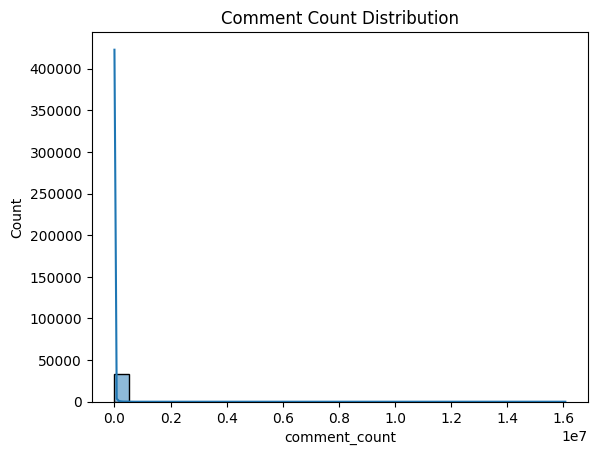

In [36]:
# Summary statistics
print(df['comment_count'].describe())
# Histogram
sns.histplot(df['comment_count'].dropna(), kde=True, bins=30)
plt.title('Comment Count Distribution')
plt.show()

In [37]:
# Define Features 
features = ['view_count', 'likes', 'dislikes', 'comment_count', 'like_ratio', 'interaction_rate', 'tags_count']
x = df[features]
y = df['viral']

4. Train-Test Split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

5. Model Training

In [39]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

6. Evaluation

In [40]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6668
           1       0.97      1.00      0.98        31

    accuracy                           1.00      6699
   macro avg       0.98      1.00      0.99      6699
weighted avg       1.00      1.00      1.00      6699

Accuracy: 0.999850723988655


7. Save Model

In [41]:
with open("yt_viral_model.pkl", "wb") as obj:
    pickle.dump(model, obj)